# Filament Augmentation Process
---
#### Install augmentation engine package
install the package and restart the notebook.

In [1]:
pip install augmentation-engine

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\shreejaa talla\PycharmProjects\bbso_fa\venv\Scripts\python.exe -m pip install --upgrade pip' command.


### Import Required Libraries 

In [2]:
import os
from torchvision import transforms

### Libraries from augmentation engine package

In [3]:
from filament_augmentation.loader.filament_dataloader import FilamentDataLoader
from filament_augmentation.generator.filament_dataset import FilamentDataset
from filament_augmentation.metadata.filament_metadata import FilamentMetadata

### Download Data
- Sample data for the following example is provided in https://bitbucket.org/gsudmlab/bbso_data/downloads/ . Please download 2015_chir_data2.json, 2015.zip.
- Unzip the 2015.zip and provide the path to 2015 folder in the below code *path_to_your_2015_folder* and dont mention '2015' folder name just path to '2015' as shown in example below.
- Provide the path to 2015_chir_data2.json in the below code at *path_to_your_json*.

In [14]:
__file__ = 'Demo.ipynb'
path_to_json =  os.path.abspath(os.path.join(r'D:\GSU_Assignments\Semester_2\DL\augmentation_engine_backup\petdata\bbso_json_data','2015_chir_data2.json'))
# path to my 2015 folder is at /home/user/data/2015 , therefore path_to_your_2015_folder = '/home/user/data/'
path_to_2015_folder = bbso_path = os.path.abspath(r"D:\GSU_Assignments\Semester_2\DL\augmentation_engine_backup\petdata")
print(path_to_json)
print(path_to_2015_folder)

D:\GSU_Assignments\Semester_2\DL\augmentation_engine_backup\petdata\bbso_json_data\2015_chir_data2.json
D:\GSU_Assignments\Semester_2\DL\augmentation_engine_backup\petdata


### Filament Data Distribution 
**To find out the number of left, right and unidentified chiralities for an interval of time.**
- The code snippet below gives the *chirality distribution*, i.e., the distribution of left, right and unidentified chiralities for an interval of time from "2015-08-01 17:36:15" to "2015-08-09 18:15:17".
- Here the petdata has big bear space observatory(BBSO) full disk solar images from (01-09) aug 2015.
- The format for start and end time should be YYYY-MM-DD HH:MM:SS.
- The ann_file or annotation file is a H-alpha based manually labelled filaments in a json file comes with petdata.

In [15]:
filamentInfo = FilamentMetadata(ann_file = path_to_json, start_time = '2015-08-01 00:00:15',
                                    end_time = '2015-08-30 23:59:59')
filamentInfo.get_chirality_distribution()

(22, 30, 186)

- In order to generate extra filaments for left, right or unidentified chirality by either balancing the data or getting them in required ratios to train them using an ML algorithm. A filament dataset class should be initialized which is quite similar to that of pytorch dataset class.
- The transform list should be list of torchvision [transformations](https://pytorch.org/vision/0.8/transforms.html) 
- Filament ratio is tuple variable that takes (L,R,U).

---
### Scenario - 1 Basic Initalizations of augmentation engine library
---
#### Initializing Filament dataset 
To initialize filament dataset class follow parameters are required:
- bbso_path - BBSO full disk H-alpha solar images comes with petdata, path of the folder.
- ann_file - a H-alpha based manually labelled filaments in a json file comes with petdata.
- The format for start and end time should be YYYY-MM-DD HH:MM:SS.

In [16]:
dataset = FilamentDataset(bbso_path = path_to_2015_folder, ann_file = path_to_json, 
                          start_time = "2015-08-01 17:36:15", end_time = "2015-08-09 17:36:15")

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


#### Setup transformations for data augmentation

The transformations function can be refered from [torchvision transforms](https://pytorch.org/vision/0.8/transforms.html)
- Here transforms variable should have list of torchvision transforms functions as shown below: 

In [17]:
transforms1 = [
    transforms.ColorJitter(brightness=(0.25,1.25), contrast=(0.25,2.00), saturation=(0.25,2.25)),
    transforms.RandomRotation(15,expand=False,fill=110)
]

#### Initializing data loader
- dataset = object of filament dataset class.
- batch_size = number of filaments to be generated per batch.
- filament_ratio = tuple of three values, i.e., ratios of left, right and unidentified chirality to be generated in each batch.
- n_batchs = number of batchs.
- transforms = list of torchvision transformations functions
- image_dim = image dimensions if image dimension is -1 then image will not be resize, i.e., output is original image size.

In [18]:
data_loader = FilamentDataLoader(dataset = dataset,batch_size = 3 , filament_ratio = (1, 1, 1),n_batchs = 10, 
                                 transforms = transforms1, image_dim = 224)

---
### Scenario - 2 Equal Distribution of filaments 
---
#### How to generate 3 filament images for every batch with ratio of left as 1, right chirality as 1 and unidentified as 1 for 10 batches with original image dimension and display the images?

In [19]:
data_loader = FilamentDataLoader(dataset = dataset,batch_size = 3 , filament_ratio = (1, 1, 1),
                                 n_batchs = 10, transforms = transforms1, image_dim = -1)

#### Batch -1 augmented filament images and their following labels (1=R, 0= U, -1=L)


Original image


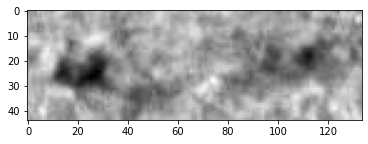

Transformed image


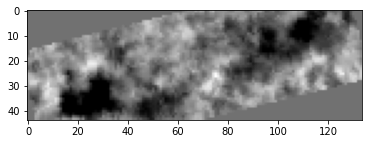

Label 0
Original image


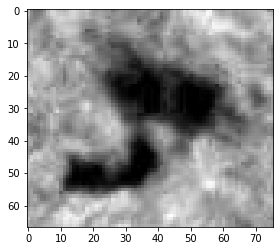

Transformed image


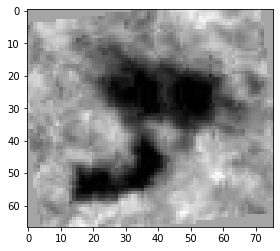

Label -1
Original image


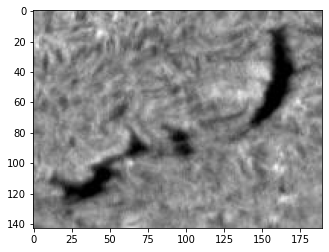

Transformed image


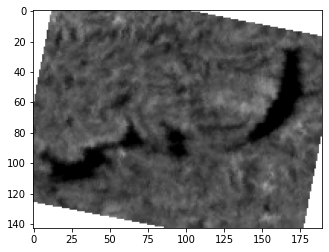

Label 1


In [20]:
import matplotlib.pyplot as plt

for original_imgs, transformed_imgs, labels in data_loader:
    for org_img, img, label in zip(original_imgs ,transformed_imgs, labels):
        print("Original image")
        plt.imshow(org_img, cmap='gray')
        plt.show()
        print("Transformed image")
        plt.imshow(img, cmap='gray')
        plt.show()
        print("Label",label)
    break

---
### Scenario - 3 Inequal Distributions of filaments data 
---
#### How to generate 12  filament images for every batch with ratio of left as 2, right chirality as 3  and unidentified as 1 for 5 batches with image dimension of 224x224 ?

In [21]:
data_loader = FilamentDataLoader(dataset = dataset,batch_size = 12 , filament_ratio = (2, 3, 1),
                                 n_batchs = 5, transforms = transforms1, image_dim = 224)

#### Distribution example 
Here, 0 indicates unidentified, 1 indicates Left and 2 indicates right chirality filaments.

In [22]:
for _, imgs, labels in data_loader:
    print("size of images ",imgs.shape)
    print("labels for each batch ",labels)

size of images  torch.Size([12, 3, 224, 224])
labels for each batch  tensor([2, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1])
size of images  torch.Size([12, 3, 224, 224])
labels for each batch  tensor([2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1])
size of images  torch.Size([12, 3, 224, 224])
labels for each batch  tensor([1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0])
size of images  torch.Size([12, 3, 224, 224])
labels for each batch  tensor([2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1])
size of images  torch.Size([12, 3, 224, 224])
labels for each batch  tensor([1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1])


---
### Scenario - 4 Eliminate one chirality type 
---
#### How to generate 10 filament images for every batch only for left and right chirality for 5 batches with image dimension of 224x224 ?
- In order to remove one type of chiraity, filament ratio, i.e., tuple(L, R, U):   
    - if L=0 that means left chirality is eliminated. Similarly, this applies to other types as well.

In [27]:
data_loader = FilamentDataLoader(dataset = dataset,batch_size = 1000 , filament_ratio = (1, 1, 0),
                                 n_batchs = 10, transforms = transforms1, image_dim = 224)

#### Distribution example 
Here, 0 indicates unidentified, 1 indicates Left and 2 indicates right chirality filaments.

In [28]:
for _, imgs, labels in data_loader:
    print("size of images ",imgs.shape)
    print("labels for each batch ",labels)

size of images  torch.Size([1000, 3, 224, 224])
labels for each batch  tensor([1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
        2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
        2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
        1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
        1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
        2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
        1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,

size of images  torch.Size([1000, 3, 224, 224])
labels for each batch  tensor([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
        1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2,
        1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2,
        1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
        2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
        1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2,
        2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
        2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,

size of images  torch.Size([1000, 3, 224, 224])
labels for each batch  tensor([2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2,
        2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
        2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
        2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1,
        2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,

size of images  torch.Size([1000, 3, 224, 224])
labels for each batch  tensor([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
        2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
        1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
        2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
        1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
        2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
        2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
        1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,

In [29]:
data_loader = FilamentDataLoader(dataset = dataset,batch_size = 10000 , filament_ratio = (1, 1, 0),
                                 n_batchs = 10, transforms = transforms1, image_dim = 224)

In [30]:
for _, imgs, labels in data_loader:
    print("size of images ",imgs.shape)
    print("labels for each batch ",labels)

size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([1, 2, 1,  ..., 2, 1, 1])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([1, 1, 1,  ..., 1, 2, 2])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([1, 1, 1,  ..., 1, 1, 2])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([2, 1, 2,  ..., 2, 1, 1])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([2, 1, 1,  ..., 1, 1, 2])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([2, 1, 1,  ..., 1, 1, 2])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([1, 1, 1,  ..., 2, 2, 1])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([2, 1, 1,  ..., 2, 1, 2])
size of images  torch.Size([10000, 3, 224, 224])
labels for each batch  tensor([2, 2, 2,  ..., 2, 2, 1])
size of images  torch.Size([10000, 3, 224, 224])
labels